# 텐서플로우(google)-산업용
* 이미지 관련 라이브러리
* keras를 이용해 코딩이 쉬움
* 순차적 sequentional, functional, class

# 파이토치(meta)-연구용
* 자연어 관련 라이브러리
* 허깅페이스, 랭체인
* class

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(np.__version__)

1.26.4


In [3]:
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv")
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data= data[['Survived', 'Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]

In [7]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [8]:
data['family'] = data['SibSp'] + data['Parch']
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,family
0,0,3,male,22.0,1,0,S,1
1,1,1,female,38.0,1,0,C,1
2,1,3,female,26.0,0,0,S,0
3,1,1,female,35.0,1,0,S,1
4,0,3,male,35.0,0,0,S,0


In [9]:
data = data.drop(['SibSp', 'Parch'], axis=1)
data.head()

,Survived,Pclass,Sex,Age,Embarked,family
0,0,3,male,22.0,S,1
1,1,1,female,38.0,C,1
2,1,3,female,26.0,S,0
3,1,1,female,35.0,S,1
4,0,3,male,35.0,S,0


In [10]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [11]:
data['Embarked'].mode()[0]

'S'

In [12]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [13]:
data.head()

,Survived,Pclass,Sex,Age,Embarked,family
0,0,3,male,22.0,S,1
1,1,1,female,38.0,C,1
2,1,3,female,26.0,S,0
3,1,1,female,35.0,S,1
4,0,3,male,35.0,S,0


In [14]:
data= pd.get_dummies(data, drop_first=True)
data.head()

,Survived,Pclass,Age,family,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,True,False,True
1,1,1,38.0,1,False,False,False
2,1,3,26.0,0,False,False,True
3,1,1,35.0,1,False,False,True
4,0,3,35.0,0,True,False,True


In [15]:
X= data.drop('Survived', axis=1)
y= data['Survived']

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
ss= StandardScaler()
X_scaled = ss.fit_transform(X)
X_scaled= pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Pclass,Age,family,Sex_male,Embarked_Q,Embarked_S
0,0.827377,-0.592481,0.059160,0.737695,-0.307562,0.615838
1,-1.566107,0.638789,0.059160,-1.355574,-0.307562,-1.623803
2,0.827377,-0.284663,-0.560975,-1.355574,-0.307562,0.615838
3,-1.566107,0.407926,0.059160,-1.355574,-0.307562,0.615838
4,0.827377,0.407926,-0.560975,0.737695,-0.307562,0.615838


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.7, random_state=10)

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [21]:
dtc = DecisionTreeClassifier(max_depth=3, random_state=10)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.85       386
           1       0.80      0.67      0.73       238

    accuracy                           0.81       624
   macro avg       0.81      0.78      0.79       624
weighted avg       0.81      0.81      0.81       624



In [22]:
for i in range(1,20):
    dtc = DecisionTreeClassifier(max_depth=i, random_state=10)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print(i)
    print(classification_report(y_test, pred))

1
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       386
           1       0.74      0.67      0.70       238

    accuracy                           0.78       624
   macro avg       0.77      0.76      0.77       624
weighted avg       0.78      0.78      0.78       624

2
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       386
           1       0.77      0.68      0.72       238

    accuracy                           0.80       624
   macro avg       0.79      0.77      0.78       624
weighted avg       0.80      0.80      0.80       624

3
              precision    recall  f1-score   support

           0       0.82      0.90      0.85       386
           1       0.80      0.67      0.73       238

    accuracy                           0.81       624
   macro avg       0.81      0.78      0.79       624
weighted avg       0.81      0.81      0.81       624

4
           

# Tensorflow Sequential API를 사용한 순차적 모델

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2024-09-10 09:11:06.582772: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-10 09:11:08.425359: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdirectml.d6f03b303ac3c4f2eeb8ca631688c9757b361310.so
2024-09-10 09:11:08.425704: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdxcore.so
2024-09-10 09:11:08.430433: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libd3d12.so
2024-09-10 09:11:08.901098: I tensorflow/c/logging.cc:34] DirectML device enumeration: found 1 compatible adapters.


# 딥러닝 신경망 모델 정의

In [24]:
X_train.shape

(267, 6)

In [25]:
X_train.shape[1]  #컬럼개수

6

In [26]:
model =Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))  #입력층, input_dim: 독립변수의 컬럼수
model.add(Dense(64, activation='relu')) #은닉층 1번
model.add(Dense(32, activation='relu')) #은닉층 2
model.add(Dense(16, activation='relu')) #은닉층 3
model.add(Dense(1, activation='sigmoid')) #출력층, 이진분류: sigmoid. 다중분류: softmax

2024-09-10 09:11:09.216368: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-10 09:11:09.217766: I tensorflow/c/logging.cc:34] DirectML: creating device on adapter 0 (AMD Radeon(TM) Graphics)
2024-09-10 09:11:09.381543: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 09:11:09.381588: W tensorflow/core/common_runtime/pluggable_device/pluggable_device_bfc_allocator.cc:28] Overriding allow_growth setting because force_memory_growth was requested by the device.
2024-09-10 09:11:09.381611: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

# 모델 파라미터 세팅 model.compile()
* loss: 오차 계산 지표
  * 이진분류: binary_crossentropy
  * 다중분류: categorical_crossentropy
  * 데이터에 0이 많은 희소행렬인 경우: sparse_categorical_crossentropy
  * 연속형데이터: (회귀분석): mse
* optimizer: 머신러닝할때 learning_rate -딥러닝 네트워크가 가장 빠르게
  * adam을 가장 많이 사용

In [27]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#순차적으로가다가 맞지않으면 역전파 오차가 이진분류일경우 binaryclassentropy
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                224       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4,961
Trainable params: 4,961
Non-trainable params: 0
_________________________________________________________________


# 모델 훈련
* epochs: 전체 데이터를 한 번 훈련 하는 주기
* batch_size: 전체 데이터를 쪼개서 훈련, 메모리에 맞춰서 크기 조절
* validation_data: 검증 데이터로 모델 검증실시

In [28]:
history = model.fit(X_train, y_train, epochs=200, batch_size=40, validation_data=(X_test, y_test))

Epoch 1/200


2024-09-10 09:11:10.106673: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 09:11:10.173851: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 09:11:10.173908: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


7/7 [==============================] - 1s 48ms/step - loss: 0.6659 - accuracy: 0.6667 - val_loss: 0.6446 - val_accuracy: 0.7035
Epoch 2/200
7/7 [==============================] - ETA: 0s - loss: 0.6238 - accuracy: 0.7191

2024-09-10 09:11:10.657359: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 09:11:10.687375: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 09:11:10.687436: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


7/7 [==============================] - 0s 22ms/step - loss: 0.6238 - accuracy: 0.7191 - val_loss: 0.6105 - val_accuracy: 0.7468
Epoch 3/200
7/7 [==============================] - 0s 21ms/step - loss: 0.5865 - accuracy: 0.7378 - val_loss: 0.5791 - val_accuracy: 0.7548
Epoch 4/200
7/7 [==============================] - 0s 22ms/step - loss: 0.5519 - accuracy: 0.7715 - val_loss: 0.5523 - val_accuracy: 0.7772
Epoch 5/200
7/7 [==============================] - 0s 22ms/step - loss: 0.5199 - accuracy: 0.7940 - val_loss: 0.5324 - val_accuracy: 0.7885
Epoch 6/200
7/7 [==============================] - 0s 21ms/step - loss: 0.4997 - accuracy: 0.7978 - val_loss: 0.5204 - val_accuracy: 0.7997
Epoch 7/200
7/7 [==============================] - 0s 22ms/step - loss: 0.4810 - accuracy: 0.8240 - val_loss: 0.5109 - val_accuracy: 0.8013
Epoch 8/200
7/7 [==============================] - 0s 22ms/step - loss: 0.4642 - accuracy: 0.8240 - val_loss: 0.4992 - val_accuracy: 0.8045
Epoch 9/200
7/7 [===============

7/7 [==============================] - 0s 24ms/step - loss: 0.2904 - accuracy: 0.8689 - val_loss: 0.5044 - val_accuracy: 0.8029
Epoch 61/200
7/7 [==============================] - 0s 24ms/step - loss: 0.2906 - accuracy: 0.8876 - val_loss: 0.5121 - val_accuracy: 0.8013
Epoch 62/200
7/7 [==============================] - 0s 24ms/step - loss: 0.2886 - accuracy: 0.8839 - val_loss: 0.5146 - val_accuracy: 0.7981
Epoch 63/200
7/7 [==============================] - 0s 25ms/step - loss: 0.2888 - accuracy: 0.8652 - val_loss: 0.5180 - val_accuracy: 0.8013
Epoch 64/200
7/7 [==============================] - 0s 24ms/step - loss: 0.2923 - accuracy: 0.8727 - val_loss: 0.5161 - val_accuracy: 0.7981
Epoch 65/200
7/7 [==============================] - 0s 24ms/step - loss: 0.2902 - accuracy: 0.8764 - val_loss: 0.5266 - val_accuracy: 0.7933
Epoch 66/200
7/7 [==============================] - 0s 24ms/step - loss: 0.2833 - accuracy: 0.8839 - val_loss: 0.5182 - val_accuracy: 0.7997
Epoch 67/200
7/7 [========

7/7 [==============================] - 0s 22ms/step - loss: 0.2439 - accuracy: 0.8951 - val_loss: 0.6949 - val_accuracy: 0.7901
Epoch 119/200
7/7 [==============================] - 0s 22ms/step - loss: 0.2462 - accuracy: 0.8951 - val_loss: 0.7023 - val_accuracy: 0.7901
Epoch 120/200
7/7 [==============================] - 0s 22ms/step - loss: 0.2403 - accuracy: 0.8989 - val_loss: 0.6967 - val_accuracy: 0.7853
Epoch 121/200
7/7 [==============================] - 0s 22ms/step - loss: 0.2426 - accuracy: 0.8951 - val_loss: 0.7030 - val_accuracy: 0.7885
Epoch 122/200
7/7 [==============================] - 0s 22ms/step - loss: 0.2411 - accuracy: 0.8914 - val_loss: 0.6994 - val_accuracy: 0.7772
Epoch 123/200
7/7 [==============================] - 0s 22ms/step - loss: 0.2341 - accuracy: 0.8989 - val_loss: 0.7087 - val_accuracy: 0.7981
Epoch 124/200
7/7 [==============================] - 0s 22ms/step - loss: 0.2447 - accuracy: 0.8839 - val_loss: 0.7011 - val_accuracy: 0.7981
Epoch 125/200
7/7 [=

Epoch 176/200
7/7 [==============================] - 0s 25ms/step - loss: 0.2084 - accuracy: 0.9101 - val_loss: 0.8763 - val_accuracy: 0.7788
Epoch 177/200
7/7 [==============================] - 0s 23ms/step - loss: 0.2085 - accuracy: 0.9176 - val_loss: 0.8956 - val_accuracy: 0.7837
Epoch 178/200
7/7 [==============================] - 0s 24ms/step - loss: 0.2093 - accuracy: 0.9139 - val_loss: 0.9071 - val_accuracy: 0.7821
Epoch 179/200
7/7 [==============================] - 0s 23ms/step - loss: 0.2078 - accuracy: 0.9176 - val_loss: 0.9062 - val_accuracy: 0.7788
Epoch 180/200
7/7 [==============================] - 0s 24ms/step - loss: 0.2091 - accuracy: 0.9064 - val_loss: 0.9142 - val_accuracy: 0.7821
Epoch 181/200
7/7 [==============================] - 0s 22ms/step - loss: 0.2086 - accuracy: 0.9139 - val_loss: 0.9118 - val_accuracy: 0.7821
Epoch 182/200
7/7 [==============================] - 0s 24ms/step - loss: 0.2043 - accuracy: 0.9176 - val_loss: 0.9138 - val_accuracy: 0.7821
Epoch 

In [29]:
# 136번째 정확도 90넘어

# 딥러닝 모델 성능 평가
* 딥러닝에서 모델의 성능을 평가하는 지표는 주로 loss를 본다
*로스는? 회귀에서 회귀선과 데이터의 오차 (mse,sse)
* 보통 loss가 낮으면 accuracy가 올라가지만 비례하지 않을 때도 있음.
* 두 지표간에 차이가 있을 경우 loss가 낮은 모델이 우수한 모델

In [30]:
score = model.evaluate(X_test, y_test)
print('test loss', score[0])
print('test accuracy', score[1])

20/20 [==============================] - 0s 6ms/step - loss: 1.0013 - accuracy: 0.7853
test loss 1.0013240575790405
test accuracy 0.7852564454078674


In [31]:
#로스가 일정기간 변화없으면 로스 낮은거 중간중간 저장하게 만들어야한다

# 딥러닝 학습결과 시각화

In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

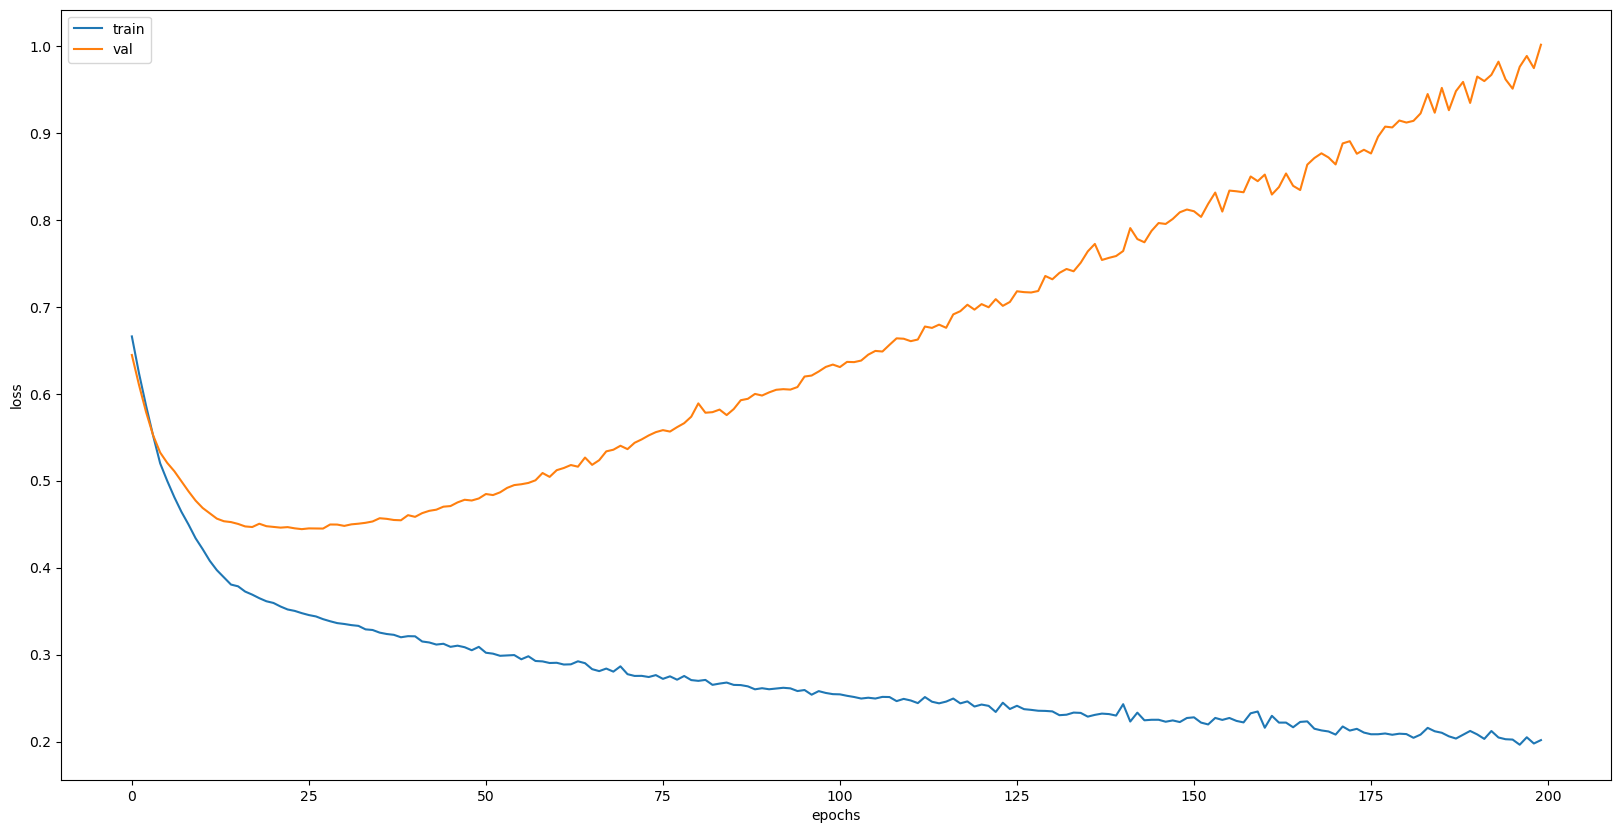

In [33]:
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [34]:
pred = model.predict(X_test)
pred

20/20 [==============================] - 0s 3ms/step


2024-09-10 09:11:42.442530: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 09:11:42.515053: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 09:11:42.515120: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-09-10 09:11:42.524911: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 09:11:42.524971: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

array([[6.58568963e-02],
       [8.94928351e-02],
       [9.63896438e-02],
       [9.99998093e-01],
       [9.99851346e-01],
       [1.59233153e-01],
       [1.00906789e-01],
       [1.66169088e-03],
       [8.07004198e-02],
       [7.12983981e-02],
       [4.02782764e-03],
       [1.21913902e-01],
       [1.33641595e-02],
       [1.75740391e-01],
       [3.49848391e-03],
       [3.42825521e-03],
       [2.65166267e-09],
       [1.65349149e-07],
       [6.62889779e-01],
       [1.81377858e-01],
       [5.98642370e-03],
       [1.85973989e-03],
       [9.87177491e-01],
       [4.14237101e-03],
       [9.99944448e-01],
       [8.94928351e-02],
       [8.94928351e-02],
       [9.99963403e-01],
       [8.94385041e-04],
       [9.99999642e-01],
       [9.99851346e-01],
       [3.42825521e-03],
       [9.94535923e-01],
       [2.19672176e-04],
       [9.99166965e-01],
       [7.45299757e-02],
       [3.55099559e-01],
       [1.00632924e-08],
       [9.07647014e-02],
       [8.07004198e-02],


In [35]:
pred =pd.DataFrame(pred)
pred

,0
0,6.585690e-02
1,8.949284e-02
2,9.638964e-02
3,9.999981e-01
4,9.998513e-01
...,...
619,2.569992e-02
620,9.999977e-01
621,3.575615e-03
622,7.501997e-08


In [36]:
pred= pred[0].apply(lambda x: 1 if x>=0.7 else 0)
pred

0      0
1      0
2      0
3      1
4      1
      ..
619    0
620    1
621    0
622    0
623    0
Name: 0, Length: 624, dtype: int64

In [37]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       386
           1       0.81      0.61      0.69       238

    accuracy                           0.79       624
   macro avg       0.80      0.76      0.77       624
weighted avg       0.80      0.79      0.79       624



# Tensorflow Functional API를 이용한 함수형 모델
* Sequential API는 단순히 층을 여러개 쌓는 형태라 복잡한 모델 생성에 한계가 있어
* Functional API는 입력층과 출력층을 사용자가 직접 정의 가능
* 다중입력(Multi-input), 다중출력(Multi-output)등 복잡한 모델을 정의 할 수 있음
* Input(shape=(독립변수 수))로 입력층 정의
* 이전 층을 다음 층의 입력으로 사용
* model()에 입력과 출력 정의


In [38]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


In [39]:
inputs = Input(shape=(X_train.shape[1])) #입력층 정의 Input(shape=(독립변수 수,))  #튜플형태로 들어가기에 컴마 적어주기
x = Dense(32, activation='relu')(inputs)  #은닉층 1번
x = Dense(64, activation='relu')(x)  #은닉층2번
x = Dense(32, activation='relu')(x)  #은닉층3번
x = Dense(16, activation='relu')(x)  #은닉층4번
x = Dense(1, activation='sigmoid')(x)  #출력층
model = Model(inputs, x)  #가변인수로 인풋에 여러개 넣을 수 있다는 것이 싴퀀셜과의 차이
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense_5 (Dense)             (None, 32)                224       
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4,961
Trainable params: 4,961
Non-trainable par

In [40]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=400, batch_size=100, validation_data=(X_test, y_test))
pred = model.predict(X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x: 1 if x >0.5 else 0)
print(classification_report(y_test, pred))

Epoch 1/400


2024-09-10 09:11:43.135828: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 09:11:43.204058: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 09:11:43.204129: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


3/3 [==============================] - 1s 100ms/step - loss: 0.7006 - accuracy: 0.4532 - val_loss: 0.6913 - val_accuracy: 0.5561
Epoch 2/400
3/3 [==============================] - 0s 37ms/step - loss: 0.6807 - accuracy: 0.6442 - val_loss: 0.6766 - val_accuracy: 0.6490
Epoch 3/400
1/3 [=========>....................] - ETA: 0s - loss: 0.6603 - accuracy: 0.8000

2024-09-10 09:11:43.494327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 09:11:43.524297: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 09:11:43.524357: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


3/3 [==============================] - 0s 41ms/step - loss: 0.6636 - accuracy: 0.7566 - val_loss: 0.6622 - val_accuracy: 0.6955
Epoch 4/400
3/3 [==============================] - 0s 39ms/step - loss: 0.6474 - accuracy: 0.7715 - val_loss: 0.6486 - val_accuracy: 0.7099
Epoch 5/400
3/3 [==============================] - 0s 35ms/step - loss: 0.6323 - accuracy: 0.7753 - val_loss: 0.6350 - val_accuracy: 0.7388
Epoch 6/400
3/3 [==============================] - 0s 38ms/step - loss: 0.6153 - accuracy: 0.8015 - val_loss: 0.6215 - val_accuracy: 0.7756
Epoch 7/400
3/3 [==============================] - 0s 36ms/step - loss: 0.5989 - accuracy: 0.8202 - val_loss: 0.6082 - val_accuracy: 0.7804
Epoch 8/400
3/3 [==============================] - 0s 36ms/step - loss: 0.5817 - accuracy: 0.8240 - val_loss: 0.5941 - val_accuracy: 0.7804
Epoch 9/400
3/3 [==============================] - 0s 36ms/step - loss: 0.5653 - accuracy: 0.8277 - val_loss: 0.5799 - val_accuracy: 0.7788
Epoch 10/400
3/3 [==============

3/3 [==============================] - 0s 35ms/step - loss: 0.3256 - accuracy: 0.8689 - val_loss: 0.4789 - val_accuracy: 0.7965
Epoch 62/400
3/3 [==============================] - 0s 37ms/step - loss: 0.3240 - accuracy: 0.8614 - val_loss: 0.4818 - val_accuracy: 0.7965
Epoch 63/400
3/3 [==============================] - 0s 38ms/step - loss: 0.3238 - accuracy: 0.8727 - val_loss: 0.4810 - val_accuracy: 0.7965
Epoch 64/400
3/3 [==============================] - 0s 36ms/step - loss: 0.3229 - accuracy: 0.8727 - val_loss: 0.4794 - val_accuracy: 0.8013
Epoch 65/400
3/3 [==============================] - 0s 37ms/step - loss: 0.3208 - accuracy: 0.8652 - val_loss: 0.4824 - val_accuracy: 0.7981
Epoch 66/400
3/3 [==============================] - 0s 43ms/step - loss: 0.3202 - accuracy: 0.8652 - val_loss: 0.4843 - val_accuracy: 0.7981
Epoch 67/400
3/3 [==============================] - 0s 37ms/step - loss: 0.3188 - accuracy: 0.8689 - val_loss: 0.4864 - val_accuracy: 0.7997
Epoch 68/400
3/3 [========

3/3 [==============================] - 0s 37ms/step - loss: 0.2837 - accuracy: 0.8839 - val_loss: 0.5464 - val_accuracy: 0.7917
Epoch 120/400
3/3 [==============================] - 0s 35ms/step - loss: 0.2822 - accuracy: 0.8839 - val_loss: 0.5487 - val_accuracy: 0.7933
Epoch 121/400
3/3 [==============================] - 0s 34ms/step - loss: 0.2807 - accuracy: 0.8801 - val_loss: 0.5512 - val_accuracy: 0.7901
Epoch 122/400
3/3 [==============================] - 0s 37ms/step - loss: 0.2810 - accuracy: 0.8801 - val_loss: 0.5552 - val_accuracy: 0.7917
Epoch 123/400
3/3 [==============================] - 0s 37ms/step - loss: 0.2806 - accuracy: 0.8839 - val_loss: 0.5558 - val_accuracy: 0.7901
Epoch 124/400
3/3 [==============================] - 0s 36ms/step - loss: 0.2792 - accuracy: 0.8876 - val_loss: 0.5553 - val_accuracy: 0.7885
Epoch 125/400
3/3 [==============================] - 0s 35ms/step - loss: 0.2795 - accuracy: 0.8839 - val_loss: 0.5552 - val_accuracy: 0.7901
Epoch 126/400
3/3 [=

Epoch 177/400
3/3 [==============================] - 0s 38ms/step - loss: 0.2549 - accuracy: 0.8989 - val_loss: 0.6390 - val_accuracy: 0.7853
Epoch 178/400
3/3 [==============================] - 0s 38ms/step - loss: 0.2542 - accuracy: 0.8914 - val_loss: 0.6436 - val_accuracy: 0.7788
Epoch 179/400
3/3 [==============================] - 0s 37ms/step - loss: 0.2554 - accuracy: 0.8914 - val_loss: 0.6508 - val_accuracy: 0.7837
Epoch 180/400
3/3 [==============================] - 0s 38ms/step - loss: 0.2553 - accuracy: 0.8951 - val_loss: 0.6494 - val_accuracy: 0.7788
Epoch 181/400
3/3 [==============================] - 0s 37ms/step - loss: 0.2530 - accuracy: 0.8989 - val_loss: 0.6494 - val_accuracy: 0.7821
Epoch 182/400
3/3 [==============================] - 0s 35ms/step - loss: 0.2519 - accuracy: 0.8989 - val_loss: 0.6533 - val_accuracy: 0.7837
Epoch 183/400
3/3 [==============================] - 0s 36ms/step - loss: 0.2521 - accuracy: 0.8951 - val_loss: 0.6578 - val_accuracy: 0.7821
Epoch 

Epoch 235/400
3/3 [==============================] - 0s 33ms/step - loss: 0.2397 - accuracy: 0.9026 - val_loss: 0.7528 - val_accuracy: 0.7837
Epoch 236/400
3/3 [==============================] - 0s 34ms/step - loss: 0.2395 - accuracy: 0.9064 - val_loss: 0.7539 - val_accuracy: 0.7853
Epoch 237/400
3/3 [==============================] - 0s 33ms/step - loss: 0.2353 - accuracy: 0.9026 - val_loss: 0.7608 - val_accuracy: 0.7837
Epoch 238/400
3/3 [==============================] - 0s 35ms/step - loss: 0.2372 - accuracy: 0.8914 - val_loss: 0.7675 - val_accuracy: 0.7869
Epoch 239/400
3/3 [==============================] - 0s 34ms/step - loss: 0.2362 - accuracy: 0.9026 - val_loss: 0.7637 - val_accuracy: 0.7821
Epoch 240/400
3/3 [==============================] - 0s 32ms/step - loss: 0.2332 - accuracy: 0.9026 - val_loss: 0.7651 - val_accuracy: 0.7804
Epoch 241/400
3/3 [==============================] - 0s 36ms/step - loss: 0.2343 - accuracy: 0.9064 - val_loss: 0.7691 - val_accuracy: 0.7853
Epoch 

Epoch 293/400
3/3 [==============================] - 0s 35ms/step - loss: 0.2218 - accuracy: 0.9101 - val_loss: 0.8724 - val_accuracy: 0.7756
Epoch 294/400
3/3 [==============================] - 0s 35ms/step - loss: 0.2205 - accuracy: 0.9064 - val_loss: 0.8674 - val_accuracy: 0.7837
Epoch 295/400
3/3 [==============================] - 0s 35ms/step - loss: 0.2215 - accuracy: 0.9139 - val_loss: 0.8662 - val_accuracy: 0.7869
Epoch 296/400
3/3 [==============================] - 0s 33ms/step - loss: 0.2180 - accuracy: 0.9101 - val_loss: 0.8715 - val_accuracy: 0.7853
Epoch 297/400
3/3 [==============================] - 0s 34ms/step - loss: 0.2218 - accuracy: 0.9064 - val_loss: 0.8777 - val_accuracy: 0.7821
Epoch 298/400
3/3 [==============================] - 0s 35ms/step - loss: 0.2212 - accuracy: 0.9101 - val_loss: 0.8666 - val_accuracy: 0.7933
Epoch 299/400
3/3 [==============================] - 0s 36ms/step - loss: 0.2222 - accuracy: 0.9101 - val_loss: 0.8697 - val_accuracy: 0.7917
Epoch 

Epoch 351/400
3/3 [==============================] - 0s 34ms/step - loss: 0.2065 - accuracy: 0.9139 - val_loss: 0.9863 - val_accuracy: 0.7821
Epoch 352/400
3/3 [==============================] - 0s 35ms/step - loss: 0.2071 - accuracy: 0.9139 - val_loss: 0.9841 - val_accuracy: 0.7901
Epoch 353/400
3/3 [==============================] - 0s 37ms/step - loss: 0.2075 - accuracy: 0.9101 - val_loss: 0.9899 - val_accuracy: 0.7869
Epoch 354/400
3/3 [==============================] - 0s 37ms/step - loss: 0.2055 - accuracy: 0.9101 - val_loss: 0.9960 - val_accuracy: 0.7821
Epoch 355/400
3/3 [==============================] - 0s 33ms/step - loss: 0.2035 - accuracy: 0.9176 - val_loss: 0.9986 - val_accuracy: 0.7788
Epoch 356/400
3/3 [==============================] - 0s 37ms/step - loss: 0.2063 - accuracy: 0.9176 - val_loss: 0.9982 - val_accuracy: 0.7837
Epoch 357/400
3/3 [==============================] - 0s 38ms/step - loss: 0.2052 - accuracy: 0.9139 - val_loss: 1.0039 - val_accuracy: 0.7804
Epoch 

2024-09-10 09:12:18.735566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


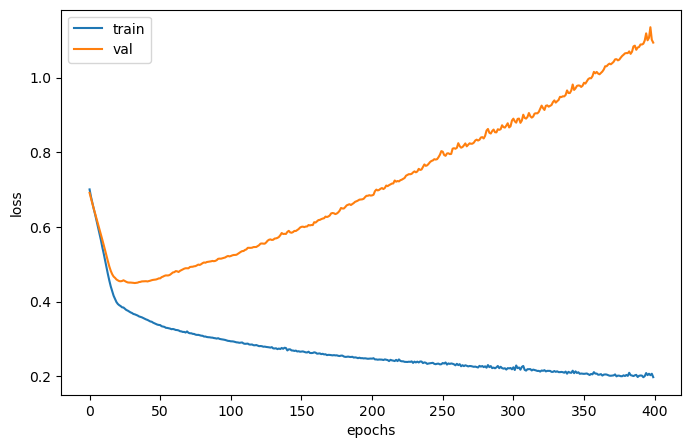

In [41]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# Model Subclassing API로 모델 만들기
* class 형태의 모델 정의 방법
* tf.keras.Model을 상속 받아 작성

In [42]:
class Titanic(tf.keras.Model):
    def __init__(self):
        super(Titanic, self).__init__()
        self.dense1= tf.keras.layers.Dense(32, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(16, activation='relu')
        self.classifier = tf.keras.layers.Dense(1, activation='sigmoid')
        
        
    def call(self, inputs):
        x= self.dense1(inputs)
        x= self.dense2(x)
        x= self.dense3(x)
        return self.classifier(x)

In [43]:
model = Titanic()

In [44]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200, batch_size=500, validation_data=(X_test, y_test))
pred = model.predict(X_test)
pred= pd.DataFrame(pred)
pred = pred[0].apply(lambda x: 1 if x>5 else 0)
print(classification_report(y_test,pred))
model.summary()

Epoch 1/200


2024-09-10 09:12:19.455694: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 09:12:19.521308: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 09:12:19.521368: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


1/1 [==============================] - 1s 886ms/step - loss: 0.6745 - accuracy: 0.5880 - val_loss: 0.6721 - val_accuracy: 0.5865
Epoch 2/200
1/1 [==============================] - 0s 50ms/step - loss: 0.6627 - accuracy: 0.6067 - val_loss: 0.6638 - val_accuracy: 0.6250
Epoch 3/200
1/1 [==============================] - 0s 75ms/step - loss: 0.6516 - accuracy: 0.6517 - val_loss: 0.6562 - val_accuracy: 0.6571
Epoch 4/200
1/1 [==============================] - ETA: 0s - loss: 0.6416 - accuracy: 0.7041

2024-09-10 09:12:19.893055: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 09:12:19.920709: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 09:12:19.920775: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


1/1 [==============================] - 0s 65ms/step - loss: 0.6416 - accuracy: 0.7041 - val_loss: 0.6495 - val_accuracy: 0.6763
Epoch 5/200
1/1 [==============================] - 0s 51ms/step - loss: 0.6322 - accuracy: 0.7266 - val_loss: 0.6432 - val_accuracy: 0.6779
Epoch 6/200
1/1 [==============================] - 0s 58ms/step - loss: 0.6236 - accuracy: 0.7341 - val_loss: 0.6370 - val_accuracy: 0.6875
Epoch 7/200
1/1 [==============================] - 0s 50ms/step - loss: 0.6151 - accuracy: 0.7416 - val_loss: 0.6310 - val_accuracy: 0.7067
Epoch 8/200
1/1 [==============================] - 0s 56ms/step - loss: 0.6070 - accuracy: 0.7603 - val_loss: 0.6252 - val_accuracy: 0.6987
Epoch 9/200
1/1 [==============================] - 0s 51ms/step - loss: 0.5992 - accuracy: 0.7640 - val_loss: 0.6195 - val_accuracy: 0.7083
Epoch 10/200
1/1 [==============================] - 0s 52ms/step - loss: 0.5914 - accuracy: 0.7678 - val_loss: 0.6140 - val_accuracy: 0.7099
Epoch 11/200
1/1 [=============

1/1 [==============================] - 0s 48ms/step - loss: 0.3897 - accuracy: 0.8277 - val_loss: 0.4573 - val_accuracy: 0.8013
Epoch 63/200
1/1 [==============================] - 0s 50ms/step - loss: 0.3883 - accuracy: 0.8277 - val_loss: 0.4562 - val_accuracy: 0.8013
Epoch 64/200
1/1 [==============================] - 0s 50ms/step - loss: 0.3869 - accuracy: 0.8277 - val_loss: 0.4551 - val_accuracy: 0.8013
Epoch 65/200
1/1 [==============================] - 0s 52ms/step - loss: 0.3855 - accuracy: 0.8352 - val_loss: 0.4541 - val_accuracy: 0.7981
Epoch 66/200
1/1 [==============================] - 0s 52ms/step - loss: 0.3841 - accuracy: 0.8352 - val_loss: 0.4530 - val_accuracy: 0.7965
Epoch 67/200
1/1 [==============================] - 0s 51ms/step - loss: 0.3827 - accuracy: 0.8352 - val_loss: 0.4520 - val_accuracy: 0.7965
Epoch 68/200
1/1 [==============================] - 0s 50ms/step - loss: 0.3814 - accuracy: 0.8390 - val_loss: 0.4511 - val_accuracy: 0.7981
Epoch 69/200
1/1 [========

1/1 [==============================] - 0s 42ms/step - loss: 0.3387 - accuracy: 0.8727 - val_loss: 0.4517 - val_accuracy: 0.8077
Epoch 121/200
1/1 [==============================] - 0s 50ms/step - loss: 0.3381 - accuracy: 0.8727 - val_loss: 0.4519 - val_accuracy: 0.8077
Epoch 122/200
1/1 [==============================] - 0s 45ms/step - loss: 0.3376 - accuracy: 0.8727 - val_loss: 0.4521 - val_accuracy: 0.8077
Epoch 123/200
1/1 [==============================] - 0s 46ms/step - loss: 0.3370 - accuracy: 0.8727 - val_loss: 0.4522 - val_accuracy: 0.8077
Epoch 124/200
1/1 [==============================] - 0s 46ms/step - loss: 0.3364 - accuracy: 0.8764 - val_loss: 0.4524 - val_accuracy: 0.8077
Epoch 125/200
1/1 [==============================] - 0s 48ms/step - loss: 0.3358 - accuracy: 0.8801 - val_loss: 0.4526 - val_accuracy: 0.8077
Epoch 126/200
1/1 [==============================] - 0s 47ms/step - loss: 0.3352 - accuracy: 0.8801 - val_loss: 0.4528 - val_accuracy: 0.8077
Epoch 127/200
1/1 [=

Epoch 178/200
1/1 [==============================] - 0s 51ms/step - loss: 0.3057 - accuracy: 0.8801 - val_loss: 0.4760 - val_accuracy: 0.7981
Epoch 179/200
1/1 [==============================] - 0s 51ms/step - loss: 0.3051 - accuracy: 0.8801 - val_loss: 0.4764 - val_accuracy: 0.7981
Epoch 180/200
1/1 [==============================] - 0s 52ms/step - loss: 0.3046 - accuracy: 0.8801 - val_loss: 0.4768 - val_accuracy: 0.7981
Epoch 181/200
1/1 [==============================] - 0s 50ms/step - loss: 0.3040 - accuracy: 0.8801 - val_loss: 0.4772 - val_accuracy: 0.7981
Epoch 182/200
1/1 [==============================] - 0s 49ms/step - loss: 0.3035 - accuracy: 0.8801 - val_loss: 0.4778 - val_accuracy: 0.7981
Epoch 183/200
1/1 [==============================] - 0s 49ms/step - loss: 0.3030 - accuracy: 0.8801 - val_loss: 0.4784 - val_accuracy: 0.7981
Epoch 184/200
1/1 [==============================] - 0s 54ms/step - loss: 0.3024 - accuracy: 0.8801 - val_loss: 0.4791 - val_accuracy: 0.7965
Epoch 

2024-09-10 09:12:30.918878: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


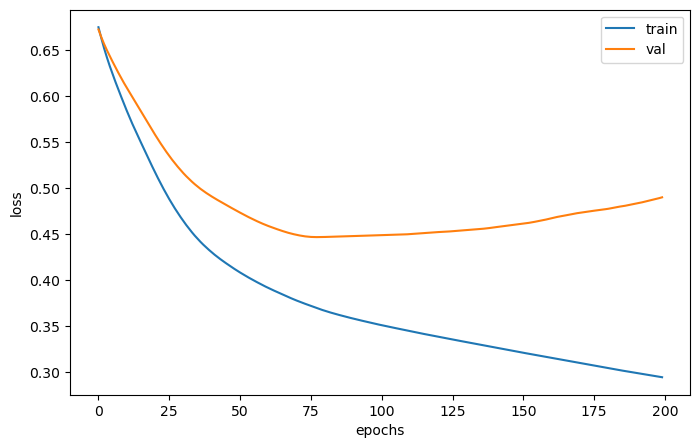

In [45]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()